## Examining the 'Mass shooting in the USA' using media discourse

Can we identify any religious or racial bias? Examining the 'Mass shooting in the USA' using media discourse: Frequency Distribution and Sentiment Analysis.

I wrote a paper on this issue. Beside codes, it is highly recommended to read the paper for your better understanding. 

In [1]:
# Importing required libraries
import nltk
from nltk import word_tokenize

# Opening the file 'Bigdata.txt' in read mode with UTF-8 encoding
with open("Bigdata.txt", "r", encoding="utf-8") as file:
    # Reading the entire content of the file into a string variable 'data'
    data = file.read()

# Tokenization: Splitting the raw text into individual words (tokens)
tokenized_raw_text = nltk.word_tokenize(data)

# Converting the list of tokens into an nltk.Text object for further processing
tokenized_text = nltk.Text(tokenized_raw_text)

In [2]:
#Total numbers of tokens
len(tokenized_text)

47326

In [3]:
#Number of tokens after deleting puctuations
text_removed_punc=[w.lower() for w in tokenized_text if w.isalpha()]
len(text_removed_punc)

38845

In [4]:
# Import the stopwords module from the nltk.corpus
from nltk.corpus import stopwords

# Initialize an empty list to store words after removing stopwords
final_text = []

# Iterate over each word in the final_text_removed_punc list
for word in text_removed_punc:
    # Check if the word is not in the list of English stopwords
    if word not in stopwords.words('english'):
        # If the word is not a stopword, append it to the final_text list
        final_text.append(word)

In [5]:
#lenth of total token after removing stopword
len(final_text)

22816

### Showing Bigram plot with Frequency Distribution

In [6]:
# Create a frequency distribution of bigrams (pairs of consecutive words) from the final_text list
bigram_fd = nltk.FreqDist(nltk.bigrams(final_text))

# Retrieve and print the 100 most common bigrams from the frequency distribution
most_common_bigrams = bigram_fd.most_common(100)
most_common_bigrams

[(('mass', 'shootings'), 307),
 (('mass', 'shooting'), 156),
 (('gun', 'violence'), 122),
 (('people', 'killed'), 66),
 (('four', 'people'), 58),
 (('united', 'states'), 51),
 (('gun', 'control'), 47),
 (('gun', 'laws'), 41),
 (('people', 'shot'), 39),
 (('domestic', 'violence'), 36),
 (('law', 'enforcement'), 35),
 (('violence', 'archive'), 34),
 (('mental', 'health'), 33),
 (('police', 'said'), 32),
 (('assault', 'weapons'), 32),
 (('gun', 'deaths'), 31),
 (('high', 'school'), 28),
 (('elementary', 'school'), 26),
 (('opened', 'fire'), 25),
 (('shot', 'killed'), 25),
 (('background', 'checks'), 25),
 (('school', 'shooting'), 24),
 (('new', 'york'), 22),
 (('fatally', 'shot'), 22),
 (('five', 'people'), 21),
 (('background', 'check'), 21),
 (('gun', 'ownership'), 21),
 (('victims', 'photo'), 20),
 (('authorities', 'said'), 20),
 (('colorado', 'springs'), 20),
 (('people', 'including'), 19),
 (('uvalde', 'texas'), 18),
 (('three', 'people'), 17),
 (('six', 'people'), 17),
 (('defines',

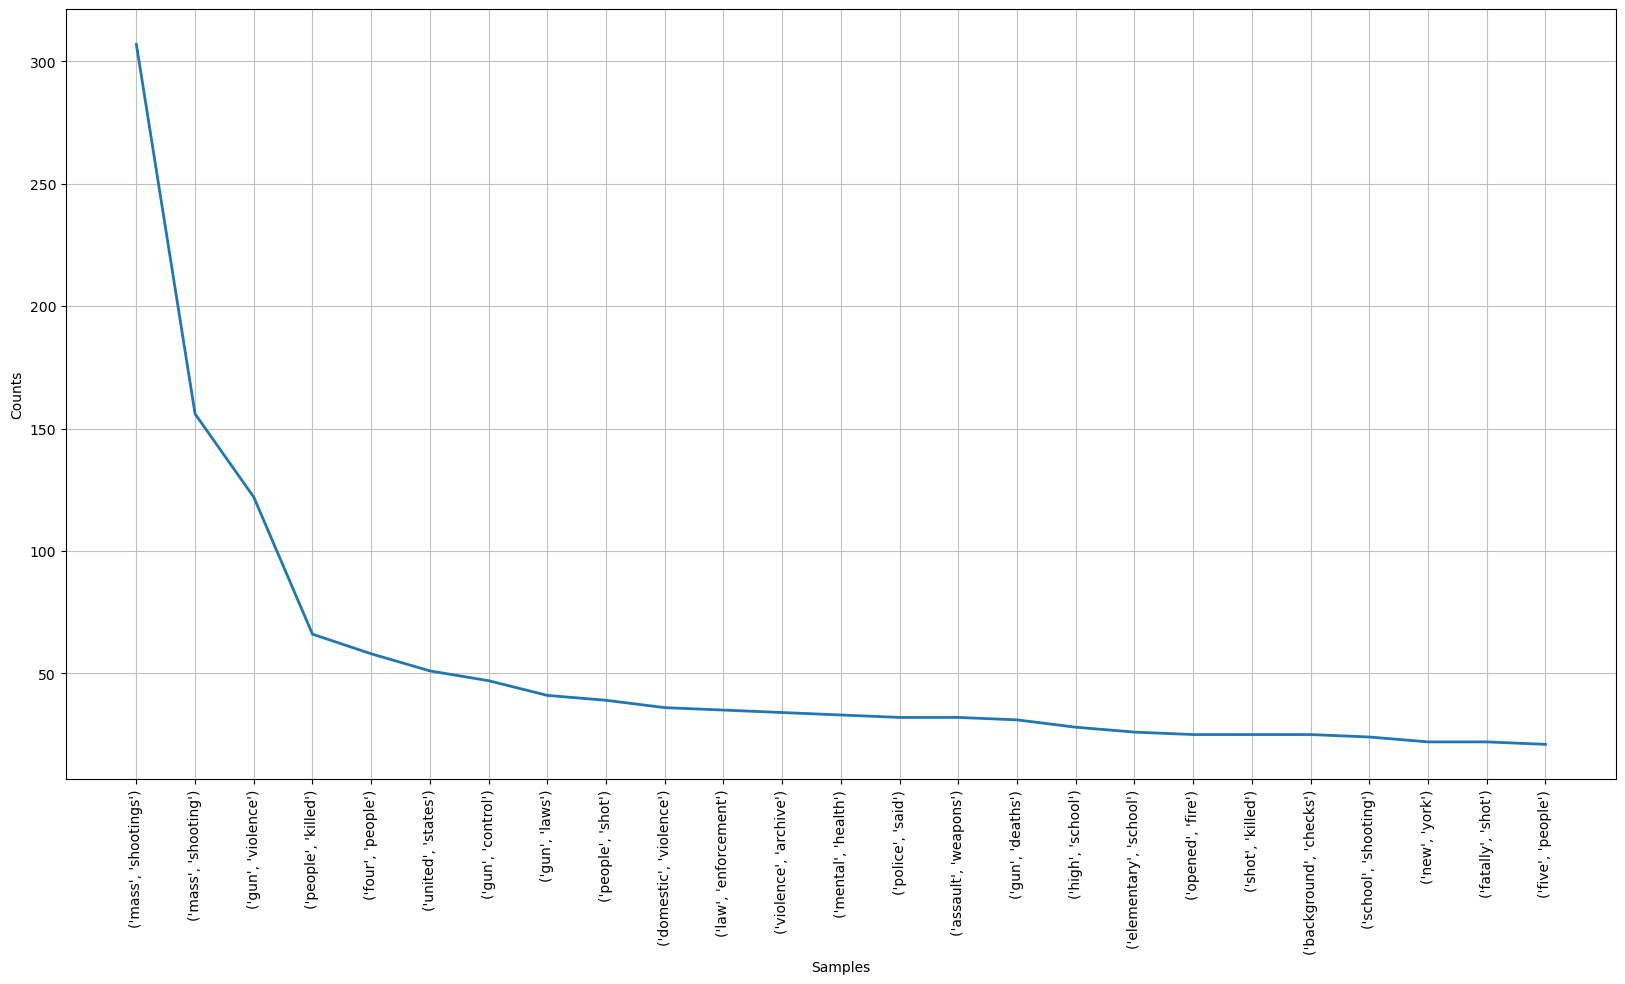

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
# Import the matplotlib.pyplot library for plotting
import matplotlib.pyplot as plt

# Create a figure and axis object for the plot with a specified figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the 25 most common bigrams from the frequency distribution using the created axis
bigram_fd.plot(25)

### Create word cloud image

In [8]:
# Import the stylecloud library for generating word clouds
import stylecloud

# Open the text file in append mode ('a' means append, 'w' means write)
with open('stylecloudsake.txt', 'a') as f:
    # Iterate over each word in the final_text list
    for i in final_text:
        # Write each word followed by a space to the file
        f.write(i + " ")
        
# Generate a stylecloud word cloud from the text file 'stylecloudsake.txt'
# The icon_name specifies the shape of the word cloud
# The size parameter sets the size of the output image
# The output file will be saved with the default name 'stylecloud.png'
stylecloud.gen_stylecloud(file_path="stylecloudsake.txt", icon_name="fas fa-users", size=(1024, 512))

# After running this code, the image will be saved in the current working directory
# as 'stylecloud.png'. You can find it there.

### Classification of the text

In [9]:
# Creating Positive & Negative word dictionaries from University of Pittsburgh MPQA corpus
# The corpus can be found at: http://mpqa.cs.pitt.edu/lexicons/subj_lexicon/
pos_words = []  # Initialize an empty list to store positive words
neg_words = []  # Initialize an empty list to store negative words

# Open the subjectivity clues file for reading
with open("C:\\Users\\faroq\\OneDrive\\Desktop\\TU Darmstadt\\Computional Discourse Analysis\\Term Paper\\Ahmed_Faroque_Matrikel_Nr. 2622114_Computational_Linguistics_for_Discourse_Analysis\\subjectivity_clues_hltemnlp05\\subjclueslen1-HLTEMNLP05.tff") as file:
    # Iterate through each line in the file
    for line in file:
        # Split the line into attributes
        line_attrib = line.split()
        # Extract the word from the 3rd attribute (word1=<word>)
        word = line_attrib[2].split('=')[1]  # 2nd column in the file
        # Extract the polarity from the last attribute (priorpolarity=<polarity>)
        polarity = line_attrib[-1].split('=')[1]  # Last column in the file
        # Append the word to the appropriate list based on its polarity
        if polarity == 'positive':
            pos_words.append(word)
        elif polarity == 'negative':
            neg_words.append(word)

# Print the total number of positive words found
print('Total positive words found: ', len(pos_words))
# Print the total number of negative words found
print('Total negative words found: ', len(neg_words))

Total positive words found:  2718
Total negative words found:  4911


In [10]:
pos_word_add = ['law', 'laws', 'policy', 'policies', 'enforcement', 'control', 'arrest']
for term in pos_word_add:
    pos_words.append(term)

neg_word_add = ['shooting','shootings','shot', 'drug', 'drugs', 'fire', 'weapon', 'weapons', ]
for term in neg_word_add:
    neg_words.append(term)

### Counting positive and Negative words in our corpus

In [11]:
# Now we will compare words in the final_text with the dictionaries of positive and negative words
# from the University of Pittsburgh MPQA corpus

# Initialize empty lists to store positive and negative words found in final_text
p_t = []  # List for positive words
n_t = []  # List for negative words

# Iterate through each word in the final_text
for w in final_text:
    # If the word is found in the positive words dictionary, add it to the p_t list
    if w in pos_words:
        p_t.append(w)

# Iterate through each word in the final_text again
for w in final_text:
    # If the word is found in the negative words dictionary, add it to the n_t list
    if w in neg_words:
        n_t.append(w)

print('Total positive words in our corpus:',len(p_t))
print('Total positive words in our corpus:',len(n_t))

Total positive words in our corpus: 1140
Total positive words in our corpus: 2441


### Textblob ###

In [12]:
from textblob import TextBlob

text=" ".join(final_text)

blob = TextBlob(text)

# Calculate the sentiment of the text
sentiment = blob.sentiment.polarity

# Print the sentiment
if sentiment > 0:
    print("The sentiment is positive.")
elif sentiment == 0:
    print("The sentiment is neutral.")
else:
    print("The sentiment is negative.")

The sentiment is negative.


In [13]:
positive_words_count = len([word for word, tag in blob.tags if TextBlob(word).sentiment.polarity > 0])
negative_words_count = len([word for word, tag in blob.tags if TextBlob(word).sentiment.polarity < 0])
print(positive_words_count)
print(negative_words_count)

800
1031


In [14]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

In [15]:
blob = TextBlob(data)
blob.sentiment

Sentiment(polarity=0.02360986808018737, subjectivity=0.3705523036583183)

In [16]:
blob = TextBlob(data, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=3.4663562899758685e-293)

### VADER

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer() 
score = analyzer.polarity_scores(text)

if score['compound'] > 0:
    print('Positive sentiment')
elif score['compound'] < 0:
    print('Negative sentiment')
else:
    print('Neutral sentiment')

Negative sentiment


In [18]:
negative_words_count = len([word for word in text.split() if analyzer.polarity_scores(word)['compound'] < 0])
positive_words_count = len([word for word in text.split() if analyzer.polarity_scores(word)['compound'] > 0])
print(negative_words_count)
print(positive_words_count)

2532
913


In [19]:
analyzer = SentimentIntensityAnalyzer() 
vs = analyzer.polarity_scores(data)
print(vs)

{'neg': 0.208, 'neu': 0.738, 'pos': 0.054, 'compound': -1.0}
